In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [46]:
data = pd.read_csv("/content/dataset-2-bankloan.csv")

In [47]:
data.drop(['Loan ID','Customer ID'],axis=1,inplace=True)

In [48]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [49]:
#this function find out the percentage of missing value for every volumn
def nullFinder(df):
    missingStore = {}
    for i in df.columns:
        if df[i].isna().sum() > 0:
            missingStore[i] = (df[i].isna().sum()*100)/df.shape[0]
    return missingStore
            

In [50]:
print("Percentage of missing value Colun wise")
nullFinder(data)

Percentage of missing value Colun wise


{'Annual Income': 19.56742344350041,
 'Bankruptcies': 0.7143283522693357,
 'Credit Score': 19.56742344350041,
 'Current Credit Balance': 0.5113715502318085,
 'Current Loan Amount': 0.5113715502318085,
 'Home Ownership': 0.5113715502318085,
 'Loan Status': 0.5113715502318085,
 'Maximum Open Credit': 0.5133613228008038,
 'Monthly Debt': 0.5113715502318085,
 'Months since last delinquent': 53.380623594723126,
 'Number of Credit Problems': 0.5113715502318085,
 'Number of Open Accounts': 0.5113715502318085,
 'Purpose': 0.5113715502318085,
 'Tax Liens': 0.5213204130767853,
 'Term': 0.5113715502318085,
 'Years in current job': 4.711781443381022,
 'Years of Credit History': 0.5113715502318085}

In [51]:
#we will drop Months since last delinquent column as it has more than 50% missing value
data.drop(['Months since last delinquent'],axis = 1, inplace=True)

In [52]:
print("Percentage of missing value Colun wise")
nullFinder(data)

Percentage of missing value Colun wise


{'Annual Income': 19.56742344350041,
 'Bankruptcies': 0.7143283522693357,
 'Credit Score': 19.56742344350041,
 'Current Credit Balance': 0.5113715502318085,
 'Current Loan Amount': 0.5113715502318085,
 'Home Ownership': 0.5113715502318085,
 'Loan Status': 0.5113715502318085,
 'Maximum Open Credit': 0.5133613228008038,
 'Monthly Debt': 0.5113715502318085,
 'Number of Credit Problems': 0.5113715502318085,
 'Number of Open Accounts': 0.5113715502318085,
 'Purpose': 0.5113715502318085,
 'Tax Liens': 0.5213204130767853,
 'Term': 0.5113715502318085,
 'Years in current job': 4.711781443381022,
 'Years of Credit History': 0.5113715502318085}

In [53]:
#filling the missing value of Credit Score and Annual Income  with average

In [54]:
data['Credit Score'].fillna(data['Credit Score'].mean(),inplace=True)
data['Annual Income'].fillna(data['Annual Income'].mean(),inplace=True)

In [55]:
print("Percentage of missing value Colun wise")
nullFinder(data)

Percentage of missing value Colun wise


{'Bankruptcies': 0.7143283522693357,
 'Current Credit Balance': 0.5113715502318085,
 'Current Loan Amount': 0.5113715502318085,
 'Home Ownership': 0.5113715502318085,
 'Loan Status': 0.5113715502318085,
 'Maximum Open Credit': 0.5133613228008038,
 'Monthly Debt': 0.5113715502318085,
 'Number of Credit Problems': 0.5113715502318085,
 'Number of Open Accounts': 0.5113715502318085,
 'Purpose': 0.5113715502318085,
 'Tax Liens': 0.5213204130767853,
 'Term': 0.5113715502318085,
 'Years in current job': 4.711781443381022,
 'Years of Credit History': 0.5113715502318085}

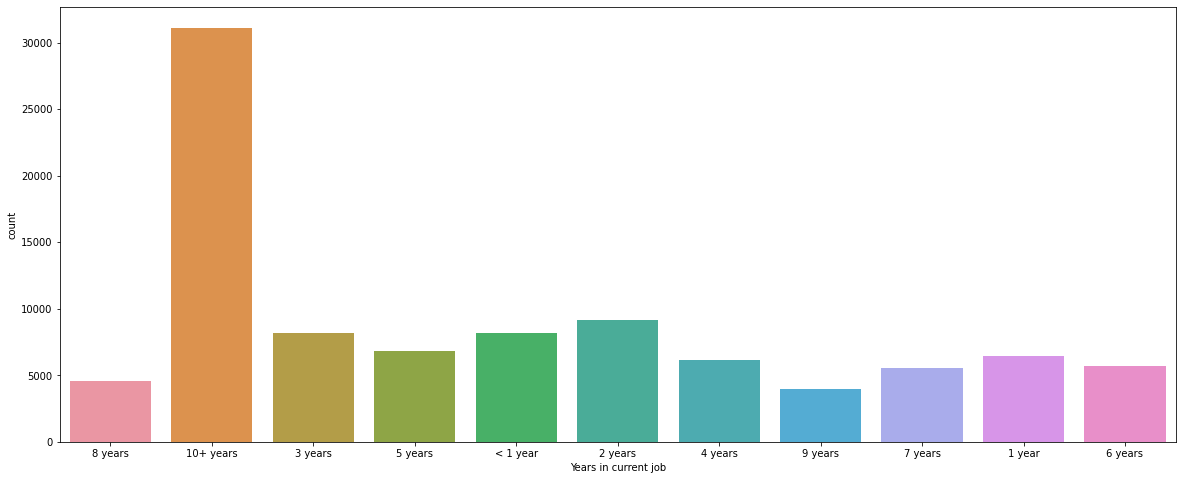

In [56]:
plt.figure(figsize=(20,8))

sns.countplot(data['Years in current job'])

In [57]:
#maximum in "Years in current job" is more than 10 years so we will fill the missing value with this

In [58]:
data['Years in current job'].fillna('10+ years',inplace=True)

In [59]:
print("Percentage of missing value Column wise")
nullFinder(data)

Percentage of missing value Column wise


{'Bankruptcies': 0.7143283522693357,
 'Current Credit Balance': 0.5113715502318085,
 'Current Loan Amount': 0.5113715502318085,
 'Home Ownership': 0.5113715502318085,
 'Loan Status': 0.5113715502318085,
 'Maximum Open Credit': 0.5133613228008038,
 'Monthly Debt': 0.5113715502318085,
 'Number of Credit Problems': 0.5113715502318085,
 'Number of Open Accounts': 0.5113715502318085,
 'Purpose': 0.5113715502318085,
 'Tax Liens': 0.5213204130767853,
 'Term': 0.5113715502318085,
 'Years of Credit History': 0.5113715502318085}

In [60]:
# and now all missing value are comming from the last 512 blank rows

In [61]:
data.dropna(inplace=True)

In [62]:
print("Percentage of missing value Colun wise")
nullFinder(data)

Percentage of missing value Colun wise


{}

In [63]:
#so we don't have any missing values
# and we have total 99794 rows and 16 columns

In [64]:
data.shape

(99794, 16)

In [65]:
object_columns = ['Loan Status','Term','Years in current job', 'Home Ownership','Purpose']
data.describe(include="object")

,Loan Status,Term,Years in current job,Home Ownership,Purpose
count,99794,99794,99794,99794,99794
unique,2,2,11,4,16
top,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
freq,77207,72002,35312,48334,78430


In [66]:
#label encodding to all string columns
le = preprocessing.LabelEncoder()
for i in object_columns:
    s = le.fit_transform(data[i])
    data[i] = s

In [67]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.000000,1.167493e+06,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,1076.456089,1.378277e+06,1,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.000000,2.231892e+06,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.000000,8.069490e+05,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,1076.456089,1.378277e+06,5,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [68]:
y = data['Loan Status']
X = data.drop(['Loan Status'],axis=1)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
reg=LogisticRegression()
reg.fit(X_train,y_train)
logitic = reg.score(X_test,y_test)

In [73]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn = knn.score(X_test,y_test)

In [74]:
# decisiontree
from sklearn import tree
clf_dt=tree.DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)
pred=clf_dt.predict(X_test)
decision = clf_dt.score(X_test,y_test)

In [75]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier()
clf_rf.fit(X_train,y_train)
random = clf_rf.score(X_test,y_test)

In [76]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
clf_gb=GradientBoostingClassifier()
clf_gb.fit(X_train,y_train)
gradient = clf_gb.score(X_test,y_test)

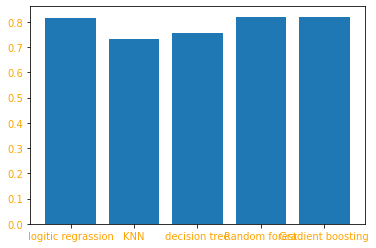

In [78]:
import numpy as np

height = [logitic,knn,decision,random,gradient]
 

bars = ('logitic regrassion', 'KNN', 'decision tree', 'Random forest', 'Gradient boosting')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height) 
plt.xticks(y_pos, bars, color='orange')
plt.yticks(color='orange') 
plt.show()

#comparision of different models